# Softmax Classifer 1D

How to build a Softmax classifier by using the Sequential module in pytorch.


In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
torch.manual_seed(0)

In [2]:
def plot_data(data_set, model=None, n=1, color=False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), "bo", label="y = 0")
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), "ro", label="y = 1")
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), "go", label="y = 2")
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ["yhat=0", "yhat=1", "yhat=2"]
        y_color = ["b", "r", "g"]
        Y = []
        for w, b, y_l, y_c in zip(
            model.state_dict()["0.weight"],
            model.state_dict()["0.bias"],
            y_label,
            y_color,
        ):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label=y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where=y1 > y1, interpolate=True, color="blue")
            plt.fill_between(x, y0, where=y1 > y2, interpolate=True, color="blue")
            plt.fill_between(x, y1, where=y1 > y0, interpolate=True, color="red")
            plt.fill_between(
                x, y1, where=((y1 > y2) * (y1 > y0)), interpolate=True, color="red"
            )
            plt.fill_between(
                x, y2, where=(y2 > y0) * (y0 > 0), interpolate=True, color="green"
            )
            plt.fill_between(x, y2, where=(y2 > y1), interpolate=True, color="green")
    plt.legend()
    plt.show()

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

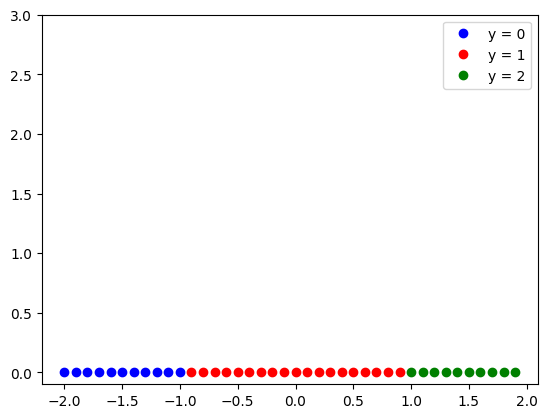

In [4]:
# Create the dataset object and plot the dataset object

data_set = Data()
data_set.x
plot_data(data_set)

In [5]:
# Build Softmax Classifier (technically only need nn.Linear is needed)

model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset=data_set, batch_size=5)

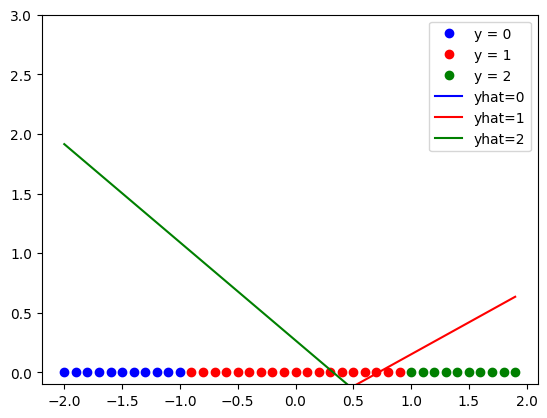

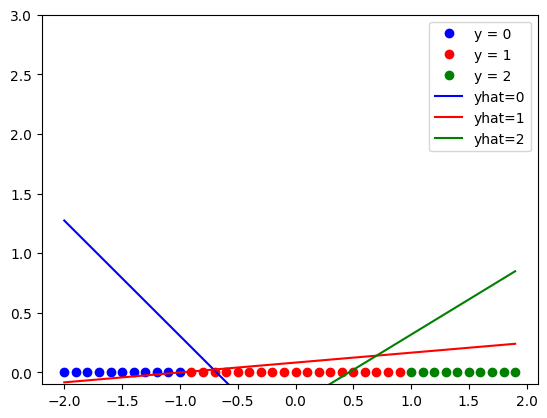

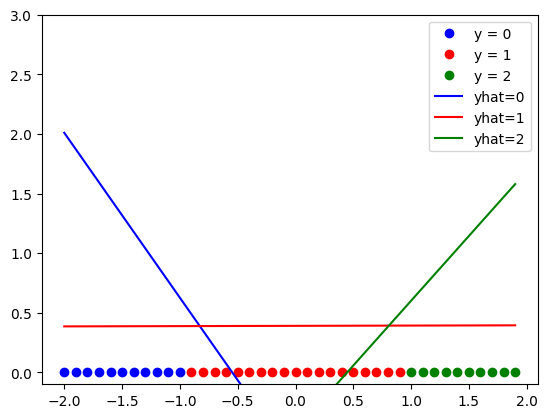

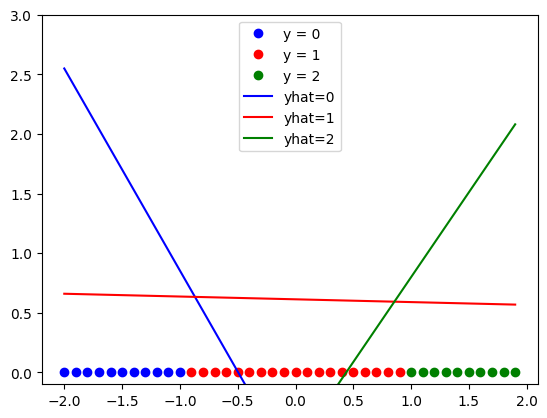

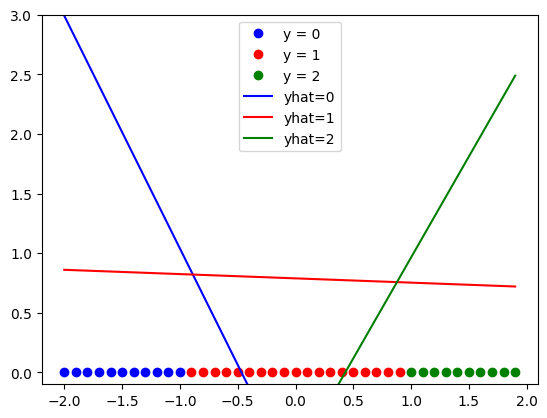

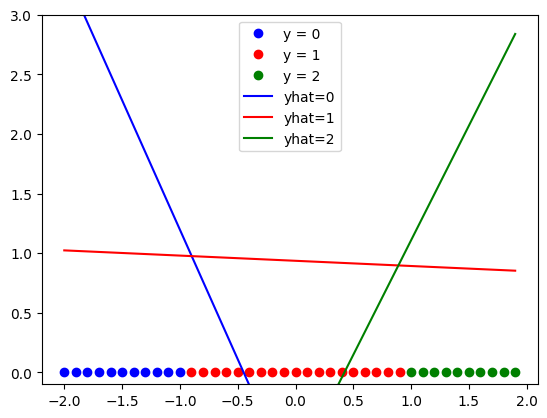

In [7]:
LOSS = []


def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set, model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()


train_model(300)

In [8]:
# Prediction
z = model(data_set.x)
_, yhat = z.max(1)
print("The prediction:", yhat)

The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [9]:
# Accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  0.975


You can also use the softmax function to convert the output to a probability, first, we create a Softmax object:


In [ ]:
Softmax_fn = nn.Softmax(dim=-1)

The result is a tensor `Probability`, where each row corresponds to a different sample, and each column corresponds to that sample belonging to a particular class


In [11]:
Probability = Softmax_fn(z)

Obtain the probability of the first sample belonging to the first, second and third class respectively as follows:


In [12]:
for i in range(3):
    print("Probability(class {}): {}".format(i, Probability[0, i]))

Probability(class 0): 0.9267547726631165
Probability(class 1): 0.07310982048511505
Probability(class 2): 0.00013548212882597
